# Filtering

In [ ]:
import numpy as np
from scipy.signal import correlate2d, convolve2d
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

# Image segmentation

In [11]:
from skimage.io import imread, imsave, imshow
from skimage.exposure import equalize_hist, rescale_intensity
from skimage.filters import try_all_threshold, inverse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

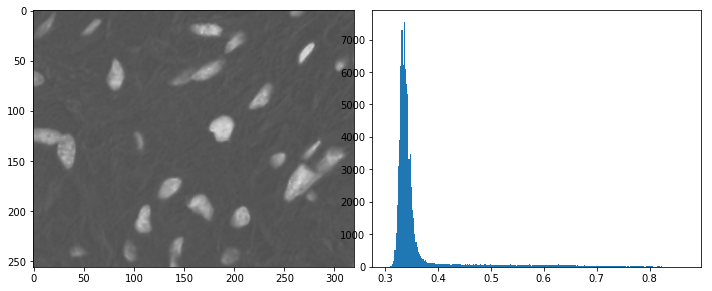

In [8]:
img = 1 - imread('nuclea.png', as_grey=True)
plt.figure(figsize=(10,4))
plt.subplot(121)
imshow(img)
plt.subplot(122)
plt.hist(img.ravel(), bins = 256);

## Supervised segmentation

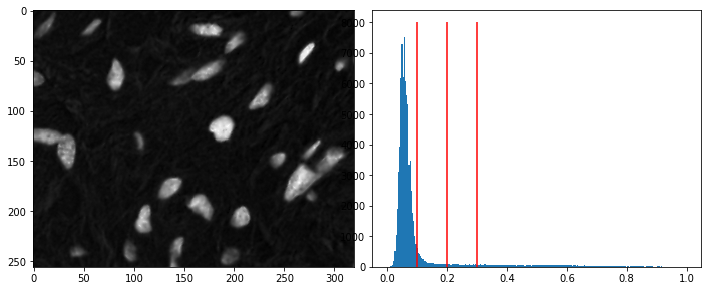

In [16]:
img_new = rescale_intensity(img)
plt.figure(figsize=(10,4))
plt.subplot(121)
imshow(img_new)
plt.subplot(122)
plt.hist(img_new.ravel(), bins = 256);
plt.vlines(0.1, 0, 8000, colors = 'r')
plt.vlines(0.2, 0, 8000, colors = 'r')
plt.vlines(0.3, 0, 8000, colors = 'r')

Text(0.5, 1.0, 'threshlod = 0.3')

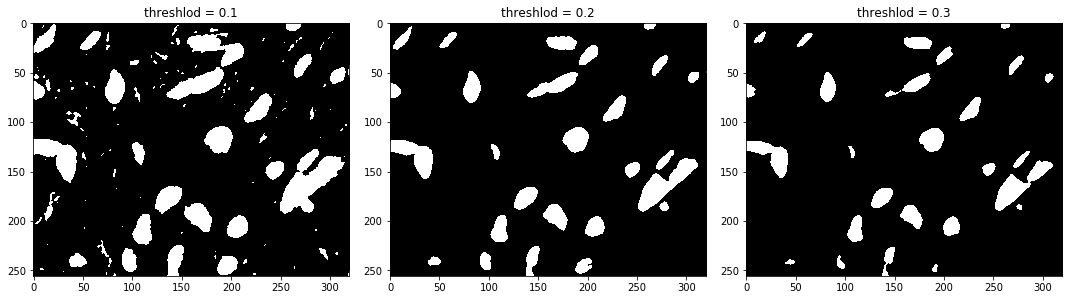

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(131)
imshow(img_new > 0.1)
plt.title('threshlod = 0.1')
plt.subplot(132)
imshow(img_new > 0.2)
plt.title('threshlod = 0.2')
plt.subplot(133)
imshow(img_new > 0.3)
plt.title('threshlod = 0.3')

## Unsupervised segmentation
Adaptive methods for choosing the threshold
- Otsu
- Li
- Local

In Otsu's method we exhaustively search for the threshold that minimizes the intra-class variance (the variance within the class), defined as a weighted sum of variances of the two classes:

\begin{aligned} 
\sigma_{w}^{2}(t) = \omega_{0}(t) \sigma_{0}^{2}(t)+ \omega_{1}(t) \sigma_{1}^{2}(t)
\end{aligned} 

Weights $\omega _{0}$ and $\omega _{1}$ are the probabilities of the two classes separated by a threshold $t$ ,and $\sigma _{0}^{2}$ and $\sigma _{1}^{2}$ are variances of these two classes.

The class probability $\omega_{0,1}(t)$ is computed from the $L$ bins of the histogram:

\begin{aligned}
\omega_{0}(t)&=\sum_{i=0}^{t-1}p(i)\\
\omega_{1}(t)&=\sum_{i=t}^{L-1}p(i)
\end{aligned}

Otsu shows that minimizing the intra-class variance is the same as maximizing inter-class variance:

\begin{aligned}
\sigma_{b}^{2}(t)&=\sigma ^{2}-\sigma_{w}^{2}(t)=\omega_{0}(\mu_{0}-\mu_{T})^{2}+\omega_{1}(\mu_{1}-\mu_{T})^{2}\\
&=\omega_{0}(t)\omega_{1}(t)\left[\mu_{0}(t)-\mu_{1}(t)\right]^{2}
\end{aligned}

which is expressed in terms of class probabilities $\omega$  and class means $\mu$.

while the class mean $\mu_{0,1,T}(t)$ is:

\begin{aligned}
\mu_{0}(t)&=\frac{\sum_{i=0}^{t-1}ip(i)}{\omega_{0}(t)} \\
\mu_{1}(t)&=\frac {\sum_{i=t}^{L-1}ip(i)}{\omega_{1}(t)} \\
\mu_{T}&=\sum_{i=0}^{L-1}ip(i)
\end{aligned}

The following relations can be easily verified:

\begin{aligned}
\omega_{0}\mu_{0}+\omega_{1}\mu_{1}&=\mu_{T}\\
\omega_{0}+\omega_{1}&=1
\end{aligned}

The class probabilities and class means can be computed iteratively. This idea yields an effective algorithm.



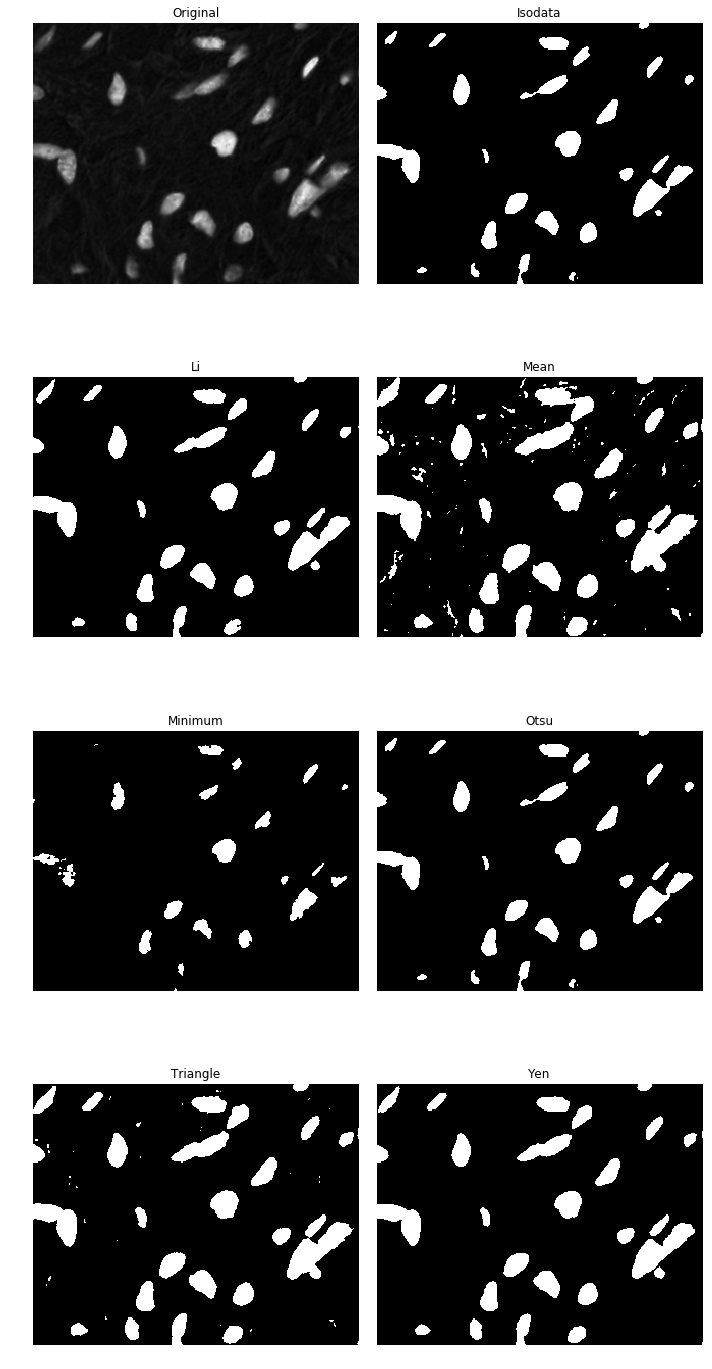

In [4]:
try_all_threshold(img, figsize=(10, 20), verbose=False);

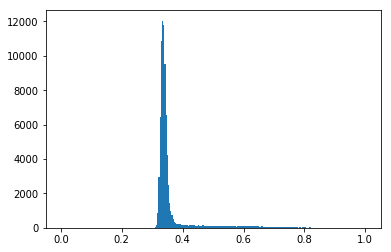

In [7]:
img_hist, cent_bins, patches = plt.hist(img.ravel(), bins=256, range=(0,1))

In [10]:
cent_bins.shape

(257,)

Задание №5. Адаптивный способ выбора порога бинаризации методом Оцу.

Метод Оцу сводится к минимизации внутриклассовой дисперсии, которая определяется как взвешенная сумма дисперсий двух классов:

$\sigma^{2}_{\omega} = \omega_1 \sigma^{2}_{1} + \omega_2 \sigma^{2}_{2}$, где $\omega_1$ и $\omega_2$ - вероятности первого и второго класса соответственно, $\sigma^{2}_{1}$ и $\sigma^{2}_{2}$ - дисперсии классов.
